# **Campus Placement ML**

In [20]:
# Libraries needed for this ML
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# set default plot size
plt.rcParams["figure.figsize"] = (15,8)

## **Load the Data**

In [25]:
# Loading the dataset
train_df = pd.read_csv("train.csv")

## **Explore the Data**

### Descriptive Statistics

In [26]:
train_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [27]:
# Drop sl_no column
train_df.drop('sl_no',axis=1,inplace=True)
train_df.shape

(215, 14)

In [28]:
# Summary
train_df.describe()

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [29]:
# Check columns for NULL values
train_df.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


Upon loading the data, we find that the dataset contains 215 observations across 14 columns, featuring a combination of categorical and numeric variables. The classification target variable is the status column, which is classified as Placed or Not Placed. Binary variables such as gender and workex will be converted to 0 and 1 for the analysis. For other categorical variables with multiple levels, we will apply One Hot Encoding to convert them into binary variables. Additionally, we will remove the first column sl_no, as it serves as an index.

### Data Visualization

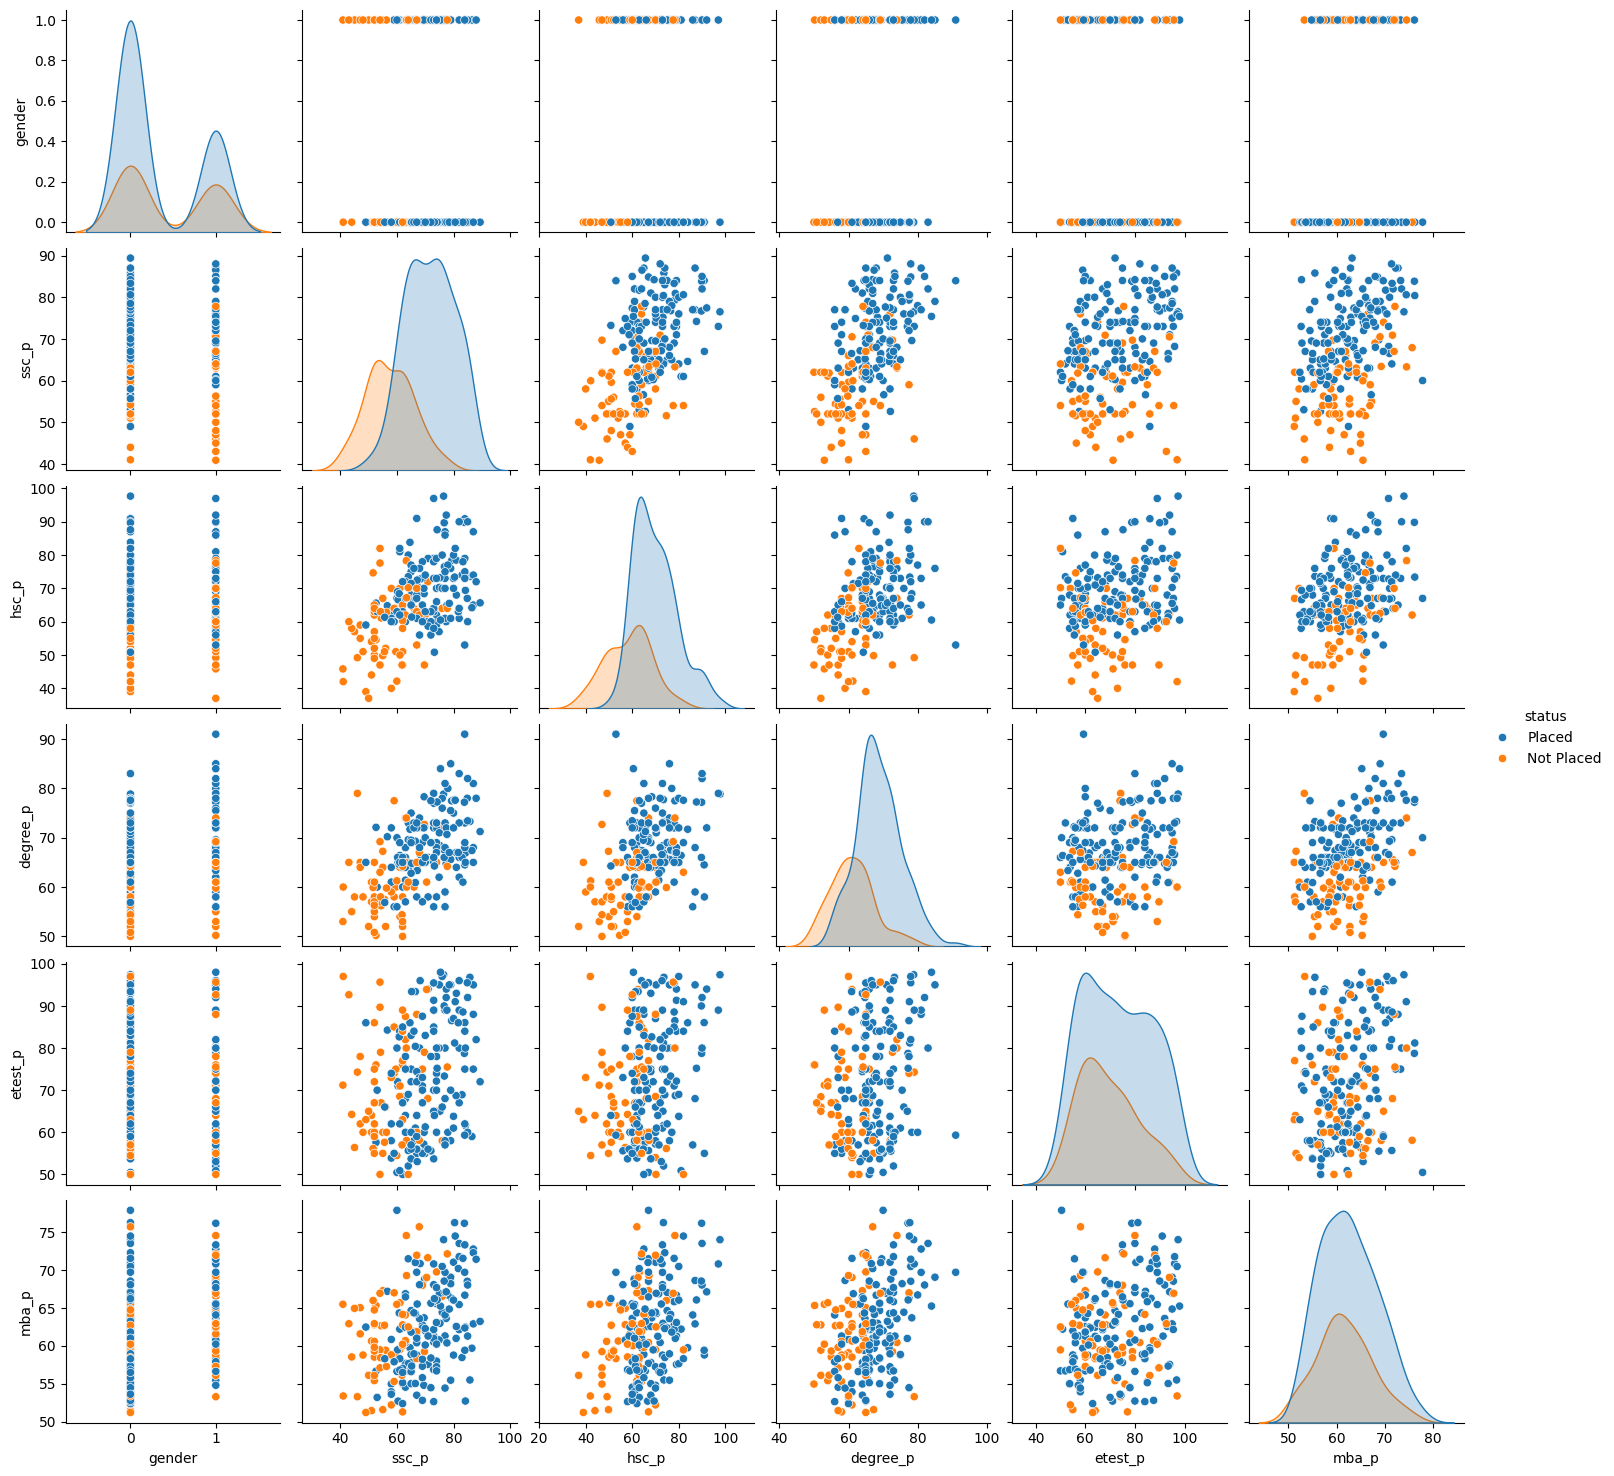

In [31]:
sns.pairplot(train_df.drop('salary',axis=1),hue = 'status')

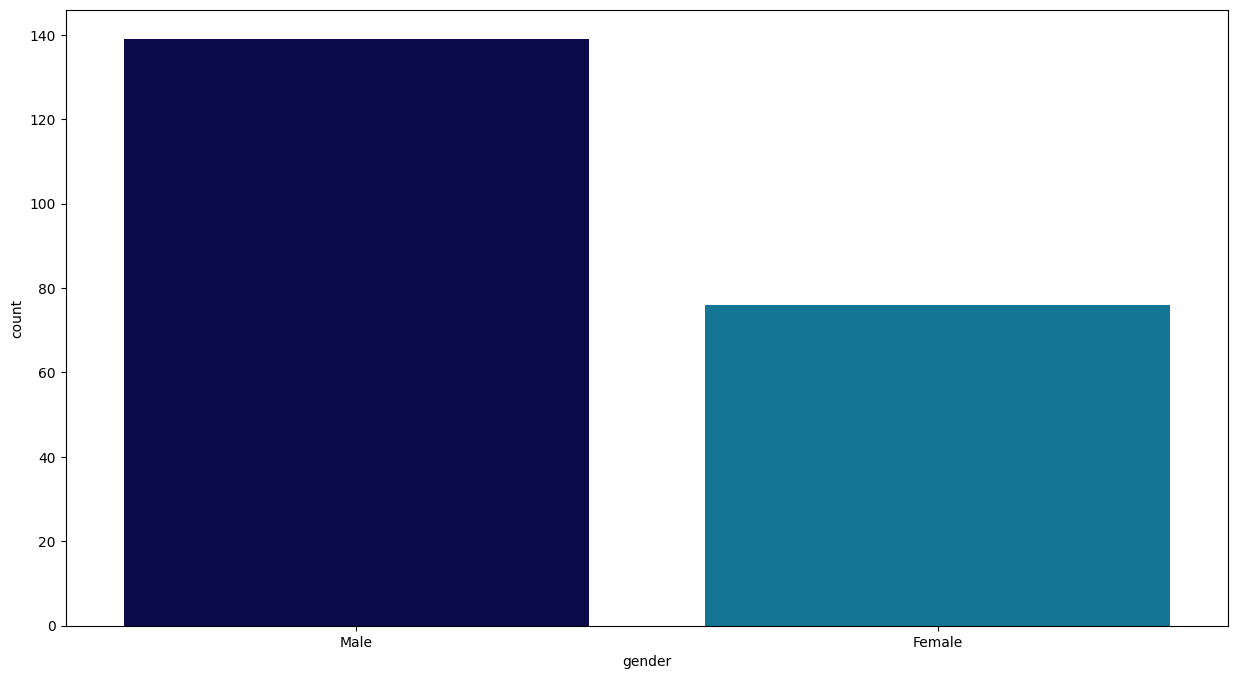

In [32]:
new_labels = ['Male', 'Female']
plot=sns.countplot(x='gender',data=train_df,palette='ocean')
plot.set_xticklabels(new_labels)
plt.show()

## **Data Preprocessing**

The target variable is status, indicating whether a student was placed or not. Additionally, we will convert categorical features into numerical representations that machine learning algorithms can understand.

In [36]:
from sklearn.preprocessing import LabelEncoder
Encode=LabelEncoder()
train_df['status']=Encode.fit_transform(train_df['status'])

In [37]:
train_df['status'].unique()

array([1, 0])

In [38]:
train_df['gender']=Encode.fit_transform(train_df['gender'])
train_df['ssc_b']=Encode.fit_transform(train_df['ssc_b'])
train_df['hsc_b']=Encode.fit_transform(train_df['hsc_b'])
train_df['hsc_s']=Encode.fit_transform(train_df['hsc_s'])
train_df['degree_t']=Encode.fit_transform(train_df['degree_t'])
train_df['workex']=Encode.fit_transform(train_df['workex'])
train_df['specialisation']=Encode.fit_transform(train_df['specialisation'])
train_df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


Handle Missing Values

In [39]:
train_df['salary']=train_df['salary'].fillna(0)
train_df.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


## **Feature Selection**

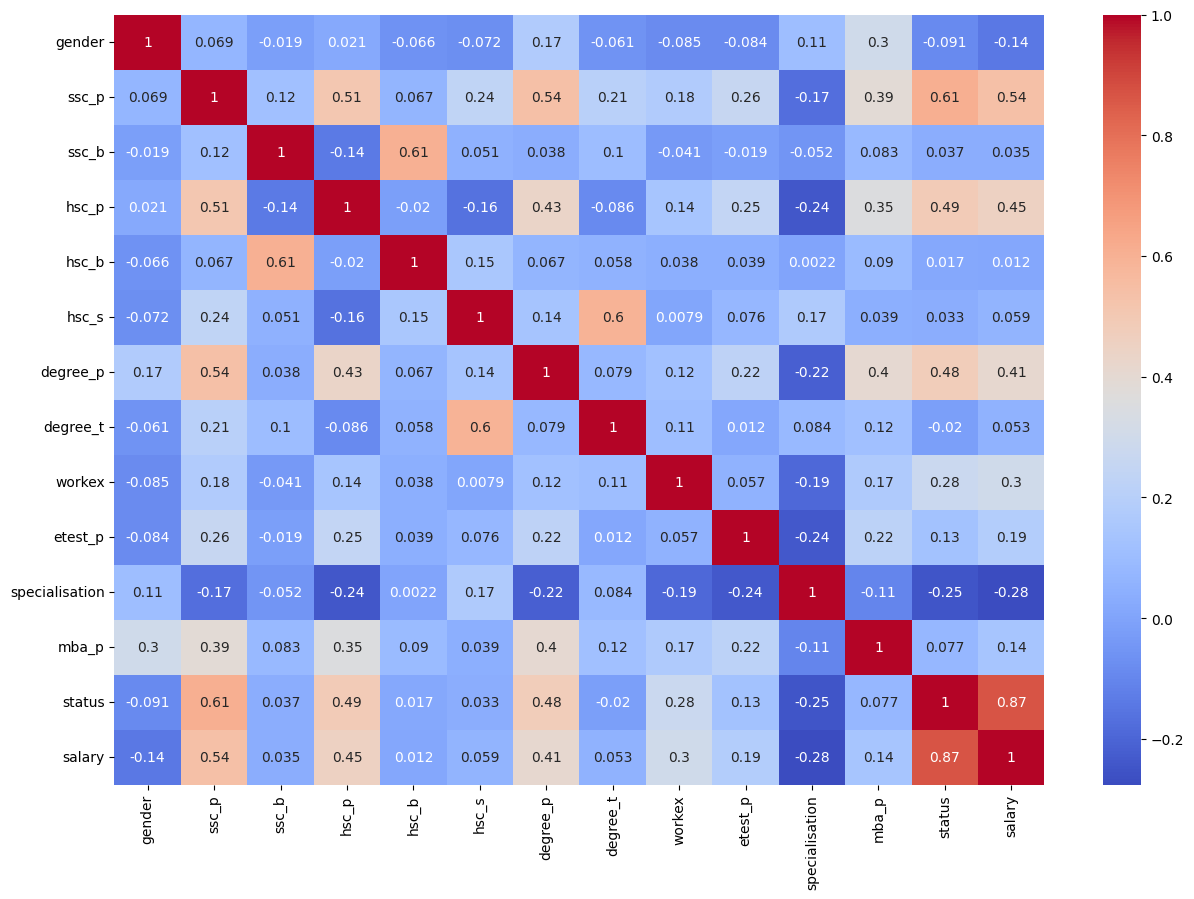

In [40]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.show()

So we conclude that 'salary' and 'ssc_p' are two important features for predicting status.

## **Model Selection**

 Since this is a binary classification problem (placed or not placed), consider algorithms like:

*   Logistic Regression: A simple and interpretable model.
*   Support Vector Machines (SVM): Effective for both linear and non-linear classification.
*   Decision Trees: Can capture non-linear relationships and provide insights into feature importance.
*   Random Forest: An ensemble method that combines multiple decision trees for improved performance.
*  Gradient Boosting Machines (GBM): Powerful models like XGBoost, LightGBM, or CatBoost.

Split the data

In [41]:
X=train_df[['salary','ssc_p']]
y=train_df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Use .iloc for integer-based indexing
X_train.iloc[:, [0,1]] = sc.fit_transform(X_train.iloc[:, [0,1]])  # Changed to [0, 1] to access existing columns
X_test.iloc[:, [0,1]] = sc.transform(X_test.iloc[:, [0,1]]) # Changed to [0, 1] to access existing columns

## **Model Training**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

names = [
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest",
    "XGBoost",
    "GradientBoosting"
]
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    xgboost.XGBRFClassifier(max_depth=3, random_state=1),
    GradientBoostingClassifier(max_depth=2, random_state=1)
]


Confusion matrix of  Logistic Regression
[[12  0]
 [ 0 31]]
Accuracy score is  1.0
Confusion matrix of  Support Vector Machine
[[12  0]
 [ 0 31]]
Accuracy score is  1.0
Confusion matrix of  Decision Tree
[[12  0]
 [ 0 31]]
Accuracy score is  1.0
Confusion matrix of  Random Forest
[[12  0]
 [ 0 31]]
Accuracy score is  1.0
Confusion matrix of  XGBoost
[[12  0]
 [ 0 31]]
Accuracy score is  1.0
Confusion matrix of  GradientBoosting
[[12  0]
 [ 0 31]]
Accuracy score is  1.0


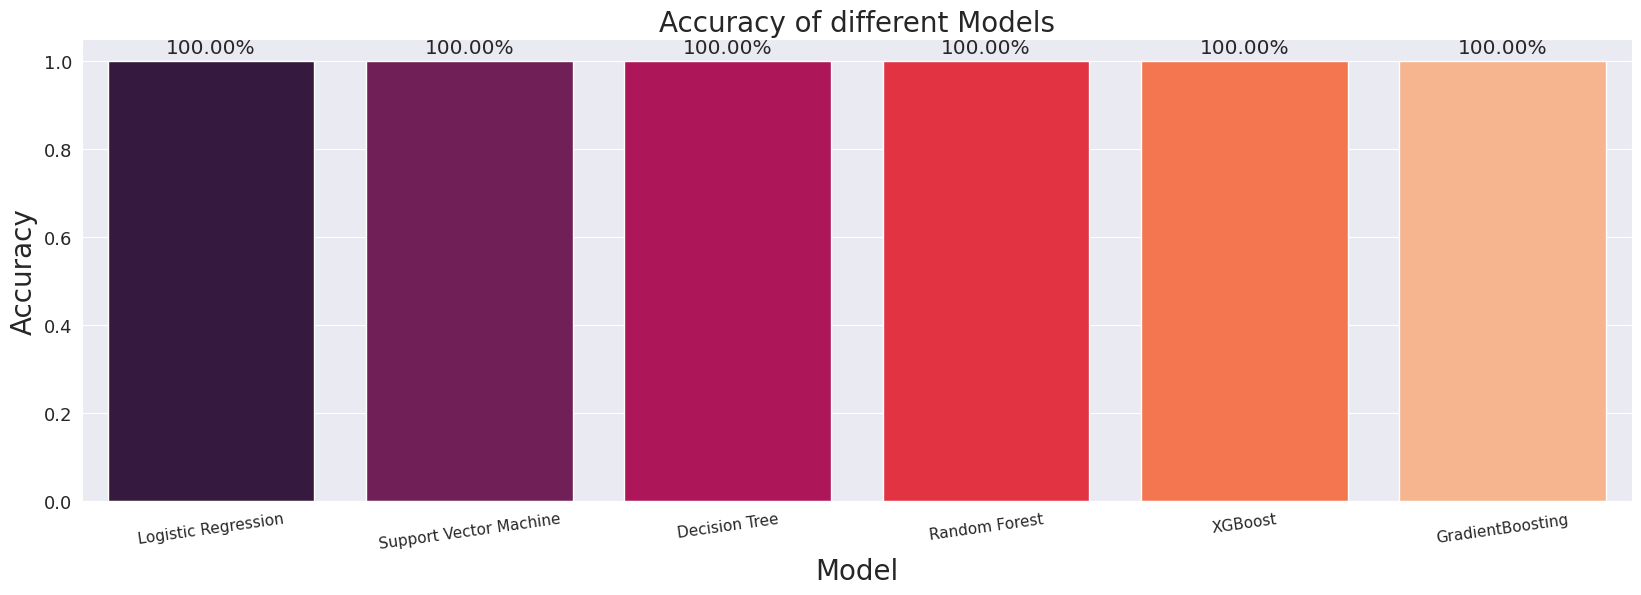

In [47]:
accuracy=[]
for model, name in zip(models,names):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ',ac)
    accuracy.append(ac)
    print('='*50)

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

plt.rcParams['figure.figsize']=20,6
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()